In [1]:
# Load various imports
import numpy as np
import pandas as pd
import os
import librosa
import ast

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sn

from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

In [3]:
# Set the path to the full UrbanSound dataset 
fulldatasetpath = '/Users/pedro/OneDrive - Universidade do Porto/Tese/UrbanSound8K/audio/'

metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["class_name"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

Finished feature extraction from  8732  files


In [4]:
featuresdf

,feature,class_label
0,"[-215.79300197978586, 71.6661218577675, -131.8...",dog_bark
1,"[-424.68685717404645, 110.56227614968253, -54....",children_playing
2,"[-459.56466281715973, 122.80034862683691, -47....",children_playing
3,"[-414.55377053561494, 102.89690543200295, -36....",children_playing
4,"[-447.39699928170836, 115.09538477641466, -53....",children_playing
...,...,...
8727,"[-399.2257209098363, 136.81901320524457, -51.9...",car_horn
8728,"[-346.7273127859397, 87.4884743538864, -46.265...",car_horn
8729,"[-304.6131609118385, 112.61991286445974, -47.1...",car_horn
8730,"[-344.7142096344138, 126.7581432632123, -56.17...",car_horn


In [5]:
def transform_to_list(row):
    return row.feature.tolist()
featuresdf["feature"] = featuresdf.apply(transform_to_list, axis=1)

In [6]:
featuresdf.to_csv("40MFCCs.csv", sep="|", index=False)

In [7]:
new_featuresdf = pd.read_csv("40MFCCs.csv", sep="|")
new_featuresdf

,feature,class_label
0,"[-215.79300197978586, 71.6661218577675, -131.8...",dog_bark
1,"[-424.68685717404645, 110.56227614968253, -54....",children_playing
2,"[-459.56466281715973, 122.80034862683691, -47....",children_playing
3,"[-414.55377053561494, 102.89690543200295, -36....",children_playing
4,"[-447.39699928170836, 115.09538477641466, -53....",children_playing
...,...,...
8727,"[-399.2257209098363, 136.81901320524457, -51.9...",car_horn
8728,"[-346.7273127859397, 87.4884743538864, -46.265...",car_horn
8729,"[-304.6131609118385, 112.61991286445974, -47.1...",car_horn
8730,"[-344.7142096344138, 126.7581432632123, -56.17...",car_horn


In [8]:
def convert_to_list(row):
    return ast.literal_eval(row.feature)
new_featuresdf['feature'] = new_featuresdf.apply(convert_to_list, axis=1)

In [9]:
new_featuresdf

,feature,class_label
0,"[-215.79300197978586, 71.6661218577675, -131.8...",dog_bark
1,"[-424.68685717404645, 110.56227614968253, -54....",children_playing
2,"[-459.56466281715973, 122.80034862683691, -47....",children_playing
3,"[-414.55377053561494, 102.89690543200295, -36....",children_playing
4,"[-447.39699928170836, 115.09538477641466, -53....",children_playing
...,...,...
8727,"[-399.2257209098363, 136.81901320524457, -51.9...",car_horn
8728,"[-346.7273127859397, 87.4884743538864, -46.265...",car_horn
8729,"[-304.6131609118385, 112.61991286445974, -47.1...",car_horn
8730,"[-344.7142096344138, 126.7581432632123, -56.17...",car_horn


In [10]:
new_featuresdf.feature[0]

[-215.79300197978586,
 71.6661218577675,
 -131.8137710605355,
 -52.09133106039041,
 -22.115966541692504,
 -21.764182004937346,
 -11.18374714512825,
 18.91268019506631,
 6.726638568856883,
 14.55689415517604,
 -11.782045895784535,
 2.301036870326384,
 -17.25130422975169,
 10.052420985567606,
 -6.009499016993739,
 -1.3153193298385262,
 -17.693509787734364,
 1.1171223735902036,
 -4.369944723364342,
 7.262952837804102,
 -11.81597010019415,
 -7.495261552200067,
 5.4577132249598765,
 -2.944245465389455,
 -5.869388859452769,
 -0.09865485502752598,
 -3.2121700561250046,
 4.609251174932417,
 -5.8293269146817055,
 -5.347507326362163,
 1.3341219222914416,
 7.130782488071522,
 -0.07944967151592043,
 1.7109244794526912,
 -5.69420010137072,
 -2.9041713698169107,
 3.036695849692799,
 -1.6827588906866613,
 -0.8858582209870957,
 0.35438893556506207]

In [11]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(new_featuresdf.feature.tolist())
y = np.array(new_featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [12]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [13]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

# Logistic Regression

In [14]:
model = LogisticRegression(multi_class='ovr')

In [15]:
y_train_one_column = []
for one_hot_array in y_train:
    y_train_one_column.append(str(np.argmax(one_hot_array)))
y_train_one_column = np.array(y_train_one_column)
y_test_one_column = []
for one_hot_array in y_test:
    y_test_one_column.append(str(np.argmax(one_hot_array)))
y_test_one_column = np.array(y_test_one_column)

In [16]:
model.fit(x_train, y_train_one_column)

C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_train_one_column.shape

(6985,)

In [18]:
y_train.shape

(6985, 10)

In [19]:
x_train.shape

(6985, 40)

In [20]:
featuresdf.head()

,feature,class_label
0,"[-215.79300197978586, 71.6661218577675, -131.8...",dog_bark
1,"[-424.68685717404645, 110.56227614968253, -54....",children_playing
2,"[-459.56466281715973, 122.80034862683691, -47....",children_playing
3,"[-414.55377053561494, 102.89690543200295, -36....",children_playing
4,"[-447.39699928170836, 115.09538477641466, -53....",children_playing


In [21]:
featuresdf.to_csv(path_or_buf='features')

In [22]:
len(y_train[0])

10

In [23]:
model.score(x_test, y_test_one_column)

0.5632512879221523

In [24]:
y_predicted = model.predict(x_test)

In [25]:
cm = confusion_matrix(y_test_one_column, y_predicted, normalize=None)
cm

array([[111,   0,  13,   5,  10,  19,   0,  10,   5,  30],
       [  5,  63,   5,   0,   1,   3,   1,   6,   0,   2],
       [ 16,   0, 105,  16,  13,   8,   0,   1,   7,  17],
       [ 11,   3,  14, 126,   9,   6,   1,   0,  20,  11],
       [ 19,   0,  17,   6, 105,  10,   1,  33,   5,  10],
       [ 40,   1,   9,   5,   7,  97,   0,  22,   6,   6],
       [  3,   1,   4,  30,   3,   3,   3,   3,   2,  20],
       [ 13,   2,   2,   0,  28,   9,   0, 145,   3,   6],
       [ 10,   0,   5,   5,   0,  10,   0,   2, 133,   0],
       [ 35,   5,  33,   7,  18,  15,   0,  13,   8,  96]], dtype=int64)

Text(68.09375, 0.5, 'Truth')

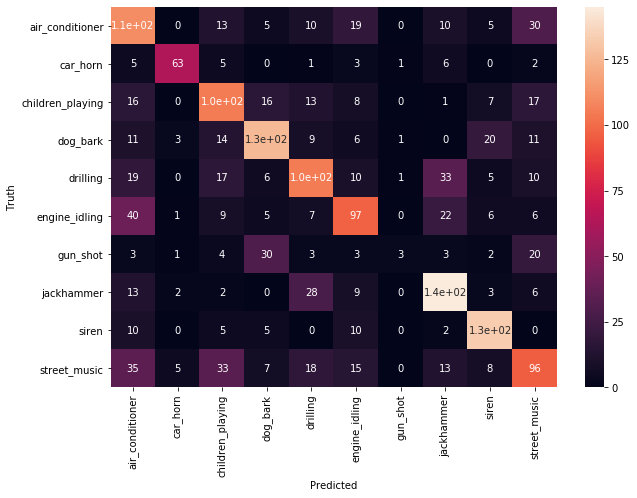

In [26]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Random Forest

In [27]:
# training a Random Forest classifier
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(x_train, y_train_one_column)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [28]:
model.score(x_test, y_test_one_column)

0.8580423583285632

In [29]:
y_predicted = model.predict(x_test)

In [30]:
cm = confusion_matrix(y_test_one_column, y_predicted, normalize='true')
cm

array([[0.94581281, 0.        , 0.01477833, 0.        , 0.00985222,
        0.        , 0.        , 0.00985222, 0.00492611, 0.01477833],
       [0.05813953, 0.79069767, 0.02325581, 0.01162791, 0.03488372,
        0.        , 0.        , 0.03488372, 0.        , 0.04651163],
       [0.02185792, 0.        , 0.83606557, 0.06557377, 0.0273224 ,
        0.        , 0.        , 0.01639344, 0.00546448, 0.0273224 ],
       [0.01492537, 0.00497512, 0.07462687, 0.8358209 , 0.01492537,
        0.00497512, 0.        , 0.        , 0.02985075, 0.0199005 ],
       [0.02427184, 0.        , 0.02427184, 0.02912621, 0.82524272,
        0.        , 0.        , 0.04854369, 0.00485437, 0.04368932],
       [0.        , 0.        , 0.01036269, 0.00518135, 0.        ,
        0.96373057, 0.        , 0.01036269, 0.00518135, 0.00518135],
       [0.02777778, 0.        , 0.09722222, 0.08333333, 0.        ,
        0.01388889, 0.75      , 0.        , 0.        , 0.02777778],
       [0.00480769, 0.        , 0.       

Text(68.09375, 0.5, 'Truth')

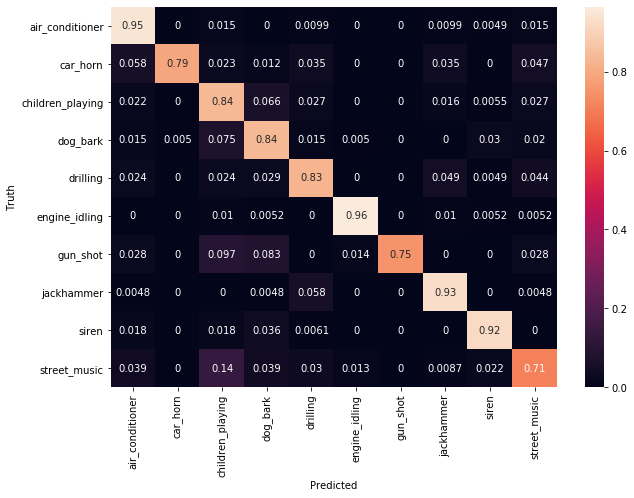

In [31]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Feed-forward Neural Network

In [32]:
num_labels = y_train.shape[1]

N=1

model = Sequential()

model.add(Dense(1024, input_shape=(40,)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

for i in range(N-1):
    model.add(Dense(1024))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(x_train, y_train, batch_size=32, epochs=250)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/250





6985/6985 [==============================] - 3s 362us/step - loss: 1.6648 - acc: 0.4266
Epoch 2/250
6985/6985 [==============================] - 2s 294us/step - loss: 1.2518 - acc: 0.5765
Epoch 3/250
6985/6985 [==============================] - 2s 285us/step - loss: 1.0702 - acc: 0.6411
Epoch 4/250
6985/6985 [==============================] - 2s 276us/step - loss: 0.9493 - acc: 0.6807
Epoch 5/250
6985/6985 [==============================] - 2s 285us/step - loss: 0.8764 - acc: 0.7051
Epoch 6/250
6985/6985 [==============================] - 2s 265us/step - loss: 0.8067 - acc: 0.7330
Epoch 7/250
6985/6985 [==============================] - 2s 273us/step - loss: 0.7655 - acc: 0.7492
Epoch 8/250
6985/6985 [==============================] - 2s 276us/step - loss

Epoch 48/250
6985/6985 [==============================] - 2s 252us/step - loss: 0.2547 - acc: 0.9154
Epoch 49/250
6985/6985 [==============================] - 2s 252us/step - loss: 0.2452 - acc: 0.9141
Epoch 50/250
6985/6985 [==============================] - 2s 251us/step - loss: 0.2637 - acc: 0.9069
Epoch 51/250
6985/6985 [==============================] - 2s 248us/step - loss: 0.2622 - acc: 0.9074
Epoch 52/250
6985/6985 [==============================] - 2s 264us/step - loss: 0.2498 - acc: 0.9171
Epoch 53/250
6985/6985 [==============================] - 2s 256us/step - loss: 0.2377 - acc: 0.9203
Epoch 54/250
6985/6985 [==============================] - 2s 257us/step - loss: 0.2498 - acc: 0.9138
Epoch 55/250
6985/6985 [==============================] - 2s 263us/step - loss: 0.2358 - acc: 0.9197
Epoch 56/250
6985/6985 [==============================] - 2s 255us/step - loss: 0.2357 - acc: 0.9190
Epoch 57/250
6985/6985 [==============================] - 2s 252us/step - loss: 0.2268 - ac

6985/6985 [==============================] - 2s 245us/step - loss: 0.1628 - acc: 0.9423
Epoch 129/250
6985/6985 [==============================] - 2s 267us/step - loss: 0.1390 - acc: 0.9536
Epoch 130/250
6985/6985 [==============================] - 2s 259us/step - loss: 0.1561 - acc: 0.9429
Epoch 131/250
6985/6985 [==============================] - 2s 250us/step - loss: 0.1442 - acc: 0.9483
Epoch 132/250
6985/6985 [==============================] - 2s 277us/step - loss: 0.1438 - acc: 0.9493
Epoch 133/250
6985/6985 [==============================] - 2s 293us/step - loss: 0.1374 - acc: 0.9520
Epoch 134/250
6985/6985 [==============================] - 2s 271us/step - loss: 0.1570 - acc: 0.9477
Epoch 135/250
6985/6985 [==============================] - 2s 256us/step - loss: 0.1482 - acc: 0.9509
Epoch 136/250
6985/6985 [==============================] - 2s 250us/step - loss: 0.1497 - acc: 0.9467
Epoch 137/250
6985/6985 [==============================] - 2s 267us/step - loss: 0.1517 - acc: 0

6985/6985 [==============================] - 2s 233us/step - loss: 0.1196 - acc: 0.9619
Epoch 208/250
6985/6985 [==============================] - 2s 244us/step - loss: 0.1130 - acc: 0.9615
Epoch 209/250
6985/6985 [==============================] - 2s 237us/step - loss: 0.1040 - acc: 0.9646
Epoch 210/250
6985/6985 [==============================] - 2s 339us/step - loss: 0.1276 - acc: 0.9578
Epoch 211/250
6985/6985 [==============================] - 3s 463us/step - loss: 0.1079 - acc: 0.9632
Epoch 212/250
6985/6985 [==============================] - 3s 372us/step - loss: 0.1116 - acc: 0.9619
Epoch 213/250
6985/6985 [==============================] - 3s 366us/step - loss: 0.1095 - acc: 0.9638
Epoch 214/250
6985/6985 [==============================] - 3s 448us/step - loss: 0.1016 - acc: 0.9648
Epoch 215/250
6985/6985 [==============================] - 3s 404us/step - loss: 0.1076 - acc: 0.9615
Epoch 216/250
6985/6985 [==============================] - 9s 1ms/step - loss: 0.1152 - acc: 0.9

In [33]:
y_predicted = model.predict(x_test)

In [34]:
new_y_predicted=list()
for i in y_predicted:
    maximum = max(i)
    new_list = [int(element==maximum) for element in i]
    new_y_predicted.append(new_list)
y_predicted_one_column = list()
for one_hot_array in new_y_predicted:
    y_predicted_one_column.append(str(np.argmax(one_hot_array)))
y_predicted_one_column = np.array(y_predicted_one_column)

In [35]:
cm = confusion_matrix(y_test_one_column, y_predicted_one_column, normalize='true')
cm

array([[0.96551724, 0.        , 0.00492611, 0.        , 0.        ,
        0.01970443, 0.00492611, 0.        , 0.00492611, 0.        ],
       [0.02325581, 0.88372093, 0.        , 0.02325581, 0.02325581,
        0.01162791, 0.        , 0.        , 0.        , 0.03488372],
       [0.00546448, 0.00546448, 0.8852459 , 0.04918033, 0.        ,
        0.00546448, 0.00546448, 0.        , 0.00546448, 0.03825137],
       [0.        , 0.        , 0.02487562, 0.93532338, 0.01492537,
        0.        , 0.00995025, 0.        , 0.00995025, 0.00497512],
       [0.00485437, 0.        , 0.01456311, 0.01941748, 0.91262136,
        0.        , 0.        , 0.01456311, 0.        , 0.03398058],
       [0.        , 0.        , 0.01554404, 0.        , 0.        ,
        0.98445596, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.02777778, 0.08333333, 0.        ,
        0.        , 0.88888889, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.0048076

Text(68.09375, 0.5, 'Truth')

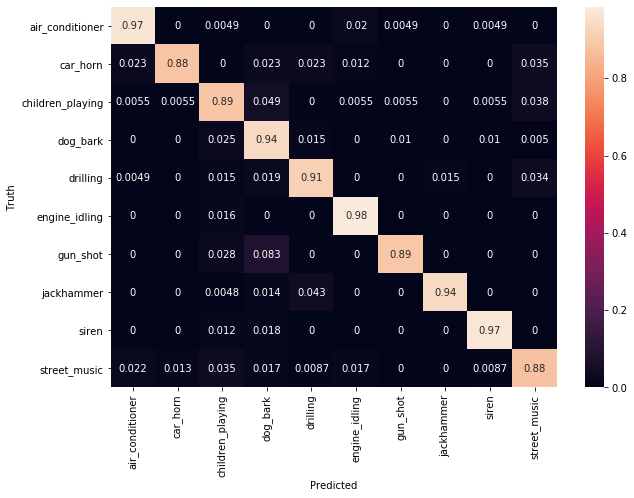

In [36]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
new_y_predicted

[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0,

# k Nearest Neighbors

In [38]:
# training a KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(x_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(x_test)
y_predicted_one_column = list()
for one_hot_array in knn_predictions:
    y_predicted_one_column.append(str(np.argmax(one_hot_array)))
y_predicted_one_column = np.array(y_predicted_one_column)
cm = confusion_matrix(y_test_one_column, y_predicted_one_column)

0.7767601602747567


Text(68.09375, 0.5, 'Truth')

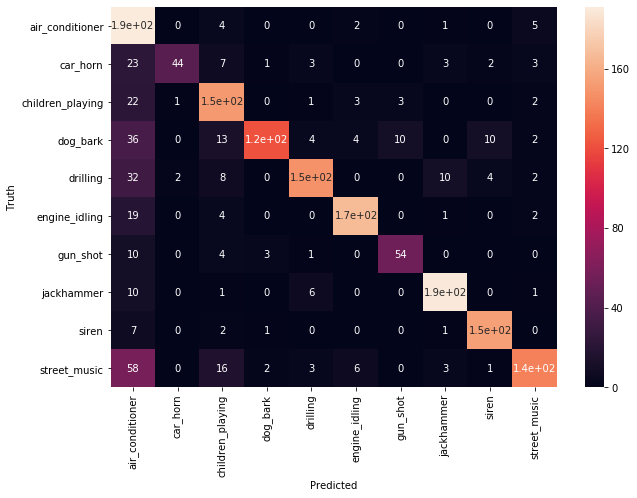

In [39]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Support Vector Machine

In [40]:
# training a linear SVM classifier 
svm_model_linear = SVC(C = 1).fit(x_train, y_train_one_column) 
svm_predictions = svm_model_linear.predict(x_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(x_test, y_test_one_column) 
print (accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test_one_column, svm_predictions)
print(cm)

0.6153405838580424
[[121   0  18   0  10   5   0  20   0  29]
 [  6  53   5   0   2   7   0   9   1   3]
 [  7   0 113  11  11  10   0   2   8  21]
 [  7   2  19 136   9   5   0   0  10  13]
 [ 10   0  13   6 106   2   0  44   7  18]
 [ 31   0  17   2   0 110   0  22   3   8]
 [  1   0   4  34   6   0  22   1   0   4]
 [ 21   0   1   0  18   1   0 164   0   3]
 [ 11   0   9   8   1   4   0   2 130   0]
 [ 30   0  34   5   5   8   0  23   5 120]]


Text(68.09375, 0.5, 'Truth')

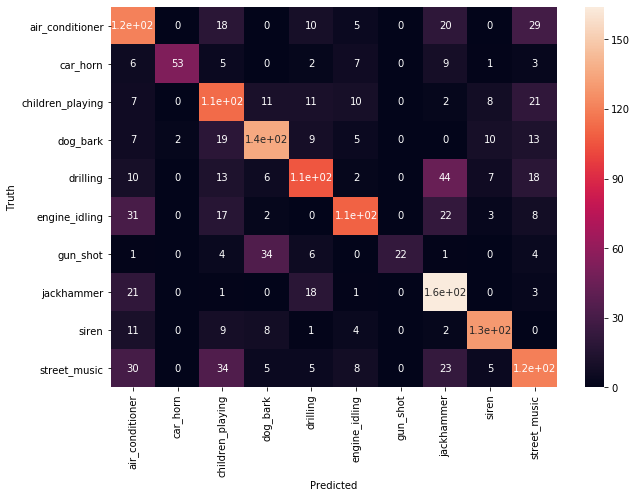

In [41]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')